In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dask.dataframe as dd
df = pd.read_parquet("/Users/hanifadelekan/dev/Trading/bid_order_book.parquet")
df.reset_index(inplace=True)

In [2]:


#df.set_index(['snapshot','price'], inplace=True)

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['size'] = pd.to_numeric(df['size'], errors='coerce')
df['price'] = df['price'].astype(float)
#df_grouped = df.groupby('snapshot')

df['level'] = df.groupby('snapshot')['price'].transform(lambda x: x.rank(ascending=False, method='dense'))

'''df['psum'] = df['price'] * df['size']
z = df.groupby('snapshot')
#z['psum'].sum()

z.get_group(0)'''
#z = df.groupby('price')


'''for group in z:
    #print('name: ',group[0],'\n','length: ',len(group[1]),'\n','standard deviation: ',group[1]['size'].std()) #find spoofing with decision tree random forest or logistic regression
    #print(group)
    pass'''

'''for group in z:
    #group[1]['level'] = group[1]['price'].rank(ascending=False)
  
    if group[1]['size'].std() > 100:
        plt.plot(group[1]['snapshot'],group[1]['size'])
plt.ylabel('size')
plt.show()'''


    

"for group in z:\n    #group[1]['level'] = group[1]['price'].rank(ascending=False)\n  \n    if group[1]['size'].std() > 100:\n        plt.plot(group[1]['snapshot'],group[1]['size'])\nplt.ylabel('size')\nplt.show()"

In [31]:
for group in df.groupby('price'):
    #print(group[1])
    pass
df['size change'] = df.groupby('price')['size'].transform(lambda x: x.std())
#print(df[df['size change'] > 100].T.to_string())
from sklearn.preprocessing import StandardScaler
x = df['size change']
y = df['size']
features = df[(abs(df['size change']) > 0) & (df['size'] > 1000) & (df['level'] < 50) ][['size', 'size change']].copy()

columns = features.columns
index = features.index

scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)
df_features = pd.DataFrame(features,columns=['size','size change'],index=index)
x = df_features['size']
y = df_features['size change']
print(df_features.to_string())
print(len(df_features))

             size  size change
3       -0.802022     1.238558
4       -0.893484    -0.654113
5       -0.769568    -0.770212
6       -0.194244     0.257876
8       -0.660404     0.164754
9       -0.093931     1.460177
10      -0.961343     0.805278
13       0.342726     1.851103
15      -0.684007    -0.459605
17      -0.200144    -0.692717
18      -0.949541    -0.939362
19      -0.622049    -0.815031
20       0.407634    -1.116244
21       0.472542     1.616237
22       2.514206     0.377239
41       0.454840    -0.553411
1003    -0.802022     1.238558
1004    -0.893484    -0.654113
1005    -0.769568    -0.770212
1006    -0.194244     0.257876
1008    -0.790221     0.164754
1009     0.035886     1.460177
1010    -0.961343     0.805278
1013     0.342726     1.851103
1015    -0.684007    -0.459605
1017    -0.200144    -0.692717
1018    -0.949541    -0.939362
1019    -0.622049    -0.815031
1020     0.407634    -1.116244
1021     0.472542     1.616237
1022     2.514206     0.377239
1041    

In [32]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
silhouette_scores = []
K = range(2, 11)
silhouette_scores = []
for cluster_number in K:
    clusterer = KMeans(n_clusters=cluster_number,n_init=1, random_state=10)
    cluster_labels = clusterer.fit_predict(df_features)
    silhouette_scores.append(silhouette_score(features, cluster_labels))
    print('done',cluster_number)


done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10


Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

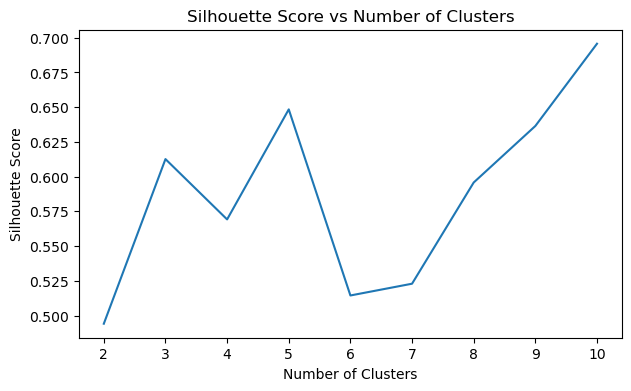

In [33]:
plt.figure(figsize=(7, 4))

plt.plot(K,silhouette_scores)

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


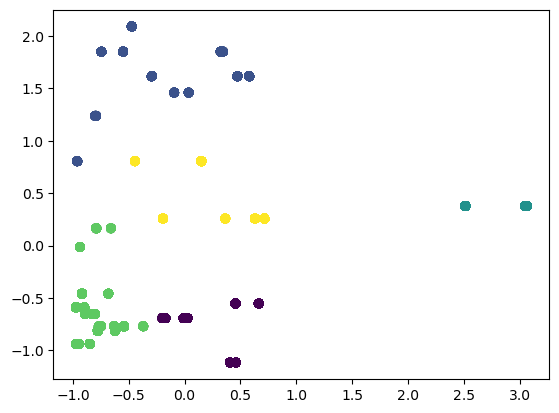

In [36]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_features)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [37]:
from collections import Counter
print(Counter(kmeans.labels_))

Counter({3: 5184, 0: 3072, 1: 2560, 4: 1984, 2: 1024})
